In [456]:
import pandas as pd
import seaborn as sns
import numpy as np
import calendar
import matplotlib.pyplot as plt


In [457]:
df=pd.read_csv('DATA.csv', encoding='ISO-8859-1')

In [458]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5684 entries, 0 to 5683
Data columns (total 90 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   EquableID                          5684 non-null   int64  
 1   System_Name                        5684 non-null   object 
 2   Plan_FullName                      5684 non-null   object 
 3   Plan_InternalName                  5684 non-null   object 
 4   Plan_Shorthand                     5684 non-null   object 
 5   Investment_Fund                    5683 non-null   object 
 6   SSA                                5661 non-null   object 
 7   SSANotes                           597 non-null    object 
 8   Job_Covers                         5684 non-null   object 
 9   StateAbbrev                        5684 non-null   object 
 10  StateName                          5684 non-null   object 
 11  GovtName                           5684 non-null   objec

In [459]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

EquableID                               0
System_Name                             0
Plan_FullName                           0
Plan_InternalName                       0
Plan_Shorthand                          0
Investment_Fund                         1
SSA                                    23
SSANotes                             5087
Job_Covers                              0
StateAbbrev                             0
StateName                               0
GovtName                                0
ActRptDate                              0
DateFYE                                 0
Month                                  22
Year                                    0
ValReport                             184
ACFR                                  185
DocumentNotes                        4808
MiscellaneousNotes                   5079
Mem_NC                                822
Mem_UAAL                              819
Mem_Tot                               819
Emp_NC                            

In [460]:
df=df.drop(columns=['SSANotes','StateAbbrev','DocumentNotes','MiscellaneousNotes','ReturnAsOf','Source','ReturnClassification','RollForward','Plan_InternalName','Plan_FullName','System_Name','EquableID' ])

In [461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5684 entries, 0 to 5683
Data columns (total 78 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Plan_Shorthand                     5684 non-null   object 
 1   Investment_Fund                    5683 non-null   object 
 2   SSA                                5661 non-null   object 
 3   Job_Covers                         5684 non-null   object 
 4   StateName                          5684 non-null   object 
 5   GovtName                           5684 non-null   object 
 6   ActRptDate                         5684 non-null   object 
 7   DateFYE                            5684 non-null   object 
 8   Month                              5662 non-null   float64
 9   Year                               5684 non-null   int64  
 10  ValReport                          5500 non-null   float64
 11  ACFR                               5499 non-null   float

In [462]:

df.isnull().sum()

Plan_Shorthand                          0
Investment_Fund                         1
SSA                                    23
Job_Covers                              0
StateName                               0
GovtName                                0
ActRptDate                              0
DateFYE                                 0
Month                                  22
Year                                    0
ValReport                             184
ACFR                                  185
Mem_NC                                822
Mem_UAAL                              819
Mem_Tot                               819
Emp_NC                                831
Emp_UAAL                              831
Emp_Tot                               818
NC_Tot                                826
UAAL_Tot                              828
AVA                                   534
AAL                                   536
UAAL                                  534
 FundedRatio_Actuarial            

In [463]:
df['Investment_Fund'].value_counts()
# sb.countplot(df['Investment_Fund'])
df['Investment_Fund'].replace(np.nan, 'Utah Retirement System', inplace=True)
df['Investment_Fund'].isnull().sum()


0

In [464]:

# sb.countplot(df['SSA'])
df['SSA'].replace(np.nan, 'Yes', inplace=True)
df['SSA'].isnull().sum()


0

In [465]:
# df['Month'].value_counts()
# sb.displot(df['Month'])
df['Month'].replace(np.nan, df['Month'].mode()[0], inplace=True)
df['Month'].isnull().sum()

0

0

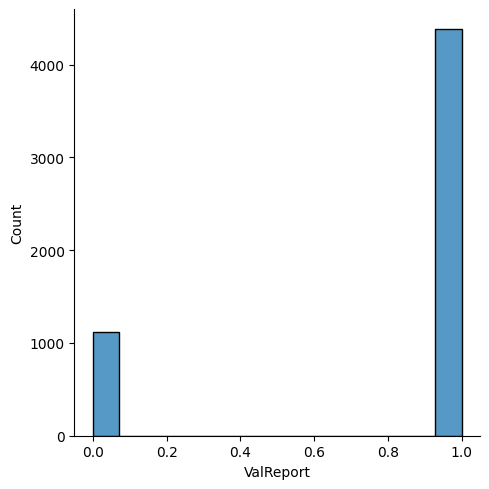

In [466]:
sns.displot(df['ValReport'])
df['ValReport'].isnull().sum()
df['ValReport'].replace(np.nan, df['ValReport'].mode()[0], inplace=True)
df['ValReport'].isnull().sum()

0

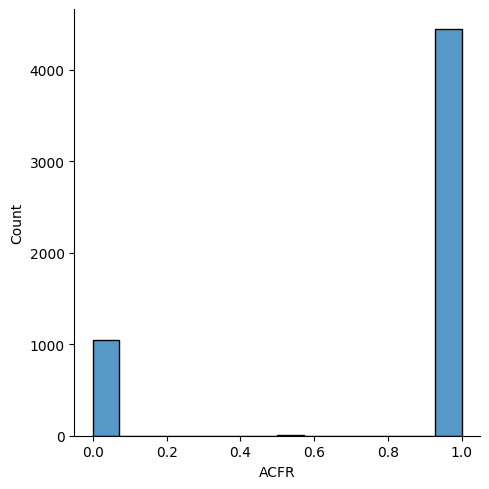

In [467]:
sns.displot(df['ACFR'])
df['ACFR'].isnull().sum()
df['ACFR'].replace(np.nan, df['ACFR'].mode()[0], inplace=True)
df['ACFR'].isnull().sum()

In [468]:
df.shape

(5684, 78)

In [469]:
df.isnull().sum()

Plan_Shorthand                          0
Investment_Fund                         0
SSA                                     0
Job_Covers                              0
StateName                               0
GovtName                                0
ActRptDate                              0
DateFYE                                 0
Month                                   0
Year                                    0
ValReport                               0
ACFR                                    0
Mem_NC                                822
Mem_UAAL                              819
Mem_Tot                               819
Emp_NC                                831
Emp_UAAL                              831
Emp_Tot                               818
NC_Tot                                826
UAAL_Tot                              828
AVA                                   534
AAL                                   536
UAAL                                  534
 FundedRatio_Actuarial            

START OF CLEANING

Mem_NC

In [470]:
# df1=df[['Plan_Shorthand','Investment_Fund','SSA','Job_Covers','StateName','GovtName','ActRptDate','DateFYE','Month','Year','ValReport','ACFR','Mem_NC']]
df['Mem_NC'] = pd.to_numeric(df['Mem_NC'], errors='coerce')
df['Mem_NC'].isnull().sum()

1112

In [471]:
df['Mem_NC'] = df['Mem_NC'].replace(['DNE', 'N/R'], np.nan)
df['Mem_NC'].isnull().sum()

1112

In [472]:
df['Mem_NC'] = df['Mem_NC'].interpolate()
df['Mem_NC'].isnull().sum()

1

In [473]:
df['Mem_NC'] = df['Mem_NC'].fillna(0.05)
df['Mem_NC'].isnull().sum()

0

Mem_UAAL

In [474]:
df['Mem_UAAL']= pd.to_numeric(df['Mem_UAAL'], errors='coerce')

In [475]:
df['Mem_UAAL'] = df['Mem_UAAL'].replace(['DNE', 'N/R'], np.nan)
df['Mem_UAAL'].isnull().sum()

1109

In [476]:
df['Mem_UAAL'] = df['Mem_UAAL'].interpolate()
df['Mem_UAAL'] = df['Mem_UAAL'].fillna(method='bfill')
df['Mem_UAAL'].isnull().sum()


0

Mem_Tot

In [477]:
df['Mem_Tot'] = pd.to_numeric(df['Mem_Tot'], errors='coerce')

In [478]:
df['Mem_Tot'] = df['Mem_Tot'].replace(['DNE', 'N/R'], np.nan)
df['Mem_Tot'].isnull().sum()

1109

In [479]:
df['Mem_Tot']  = df['Mem_Tot'].interpolate()
df['Mem_Tot'] = df['Mem_Tot'].fillna(method='bfill')
df['Mem_Tot'].isnull().sum()

0

In [480]:
(df['Mem_NC']==df['Mem_Tot']).value_counts()

True     5515
False     169
Name: count, dtype: int64

In [481]:
df.isnull().sum()
(df['ActRptDate']==df['DateFYE']).value_counts()

True     3449
False    2235
Name: count, dtype: int64

Emp_NC

In [482]:
df['Emp_NC'] = df['Emp_NC'].replace(['DNE', 'N/R'], np.nan)
df['Emp_NC']= pd.to_numeric(df['Emp_NC'], errors='coerce')



In [483]:
df['Emp_NC'] = df['Emp_NC'].interpolate()
df['Emp_NC'] = df['Emp_NC'].fillna(method='bfill')
df['Emp_NC'].isnull().sum()


0

Emp_UAAL

In [484]:
df['Emp_UAAL'] = df['Emp_UAAL'].replace(['DNE', 'N/R'], np.nan)
df['Emp_UAAL'] = pd.to_numeric(df['Emp_UAAL'], errors='coerce')


In [485]:
df['Emp_UAAL'] = df['Emp_UAAL'].interpolate()
df['Emp_UAAL'] = df['Emp_UAAL'].fillna(method='bfill')
df['Emp_UAAL'].isnull().sum()


0

Emp_Tot

In [486]:
df['Emp_Tot'] = df['Emp_Tot'].replace(['DNE', 'N/R'], np.nan)
df['Emp_Tot']= pd.to_numeric(df['Emp_Tot'], errors='coerce')


In [487]:
df['Emp_Tot'] = df['Emp_Tot'].interpolate()
df['Emp_Tot'] = df['Emp_Tot'].fillna(method='bfill')
df['Emp_Tot'].isnull().sum()

0

NC_Tot

In [488]:
df['NC_Tot'] = df['NC_Tot'].replace(['DNE', 'N/R'], np.nan)
df['NC_Tot']= pd.to_numeric(df['NC_Tot'], errors='coerce')
df['NC_Tot'] = df['NC_Tot'].interpolate()
df['NC_Tot'] = df['NC_Tot'].fillna(method='bfill')
df['NC_Tot'].isnull().sum()

0

UAAL_Tot 

In [489]:
df['UAAL_Tot']=df['UAAL_Tot'].str.replace('$','')
df['UAAL_Tot']=df['UAAL_Tot'].str.replace('(','')
df['UAAL_Tot']=df['UAAL_Tot'].str.replace(')','')
df['UAAL_Tot']=df['UAAL_Tot'].str.replace(' ','')
df['UAAL_Tot']


0        NaN
1          -
2          -
3       0.06
4       0.01
5       0.01
6       0.02
7       0.03
8       0.05
9       0.06
10      0.07
11      0.07
12      0.07
13      0.08
14      0.11
15      0.12
16      0.12
17      0.13
18      0.12
19      0.13
20      0.13
21      0.13
22      0.14
23      0.14
24       NaN
25       NaN
26         -
27         -
28      0.01
29      0.01
30      0.01
31      0.03
32      0.03
33      0.05
34      0.05
35      0.06
36      0.06
37      0.06
38      0.07
39      0.09
40      0.10
41      0.10
42      0.10
43      0.09
44      0.10
45      0.10
46      0.10
47      0.10
48      0.10
49       NaN
50       NaN
51      0.02
52      0.02
53      0.01
54      0.01
55      0.12
56      0.12
57      0.15
58      0.18
59      0.07
60      0.07
61      0.07
62      0.12
63      0.13
64      0.14
65      0.21
66      0.22
67      0.14
68      0.12
69      0.15
70      0.18
71      0.18
72      0.19
73      0.17
74       NaN
75       NaN
76      0.02

In [490]:
df['UAAL_Tot'] = df['UAAL_Tot'].replace(['DNE', 'N/R','-'], np.nan)
df['UAAL_Tot']

0        NaN
1        NaN
2        NaN
3       0.06
4       0.01
5       0.01
6       0.02
7       0.03
8       0.05
9       0.06
10      0.07
11      0.07
12      0.07
13      0.08
14      0.11
15      0.12
16      0.12
17      0.13
18      0.12
19      0.13
20      0.13
21      0.13
22      0.14
23      0.14
24       NaN
25       NaN
26       NaN
27       NaN
28      0.01
29      0.01
30      0.01
31      0.03
32      0.03
33      0.05
34      0.05
35      0.06
36      0.06
37      0.06
38      0.07
39      0.09
40      0.10
41      0.10
42      0.10
43      0.09
44      0.10
45      0.10
46      0.10
47      0.10
48      0.10
49       NaN
50       NaN
51      0.02
52      0.02
53      0.01
54      0.01
55      0.12
56      0.12
57      0.15
58      0.18
59      0.07
60      0.07
61      0.07
62      0.12
63      0.13
64      0.14
65      0.21
66      0.22
67      0.14
68      0.12
69      0.15
70      0.18
71      0.18
72      0.19
73      0.17
74       NaN
75       NaN
76      0.02

In [491]:
df['UAAL_Tot']= pd.to_numeric(df['UAAL_Tot'], errors='coerce')
df['UAAL_Tot'] = df['UAAL_Tot'].interpolate()
df['UAAL_Tot'] = df['UAAL_Tot'].fillna(method='bfill')
df['UAAL_Tot'].isnull().sum()

0

In [492]:
df1=df[         
['SSA','Mem_NC',     
'Mem_UAAL',    
'Mem_Tot',    
'Emp_NC',    
'Emp_UAAL',    
'Emp_Tot',    
'NC_Tot',    
'UAAL_Tot',
'TotalBenefits',
'BeneficiariesTotal']]


In [493]:
df1['TotalBenefits'] = df1['TotalBenefits'].replace(['DNE', 'N/R','-'], np.nan)
df1=df1.dropna()
df1['TotalBenefits']= pd.to_numeric(df['TotalBenefits'], errors='coerce')


C:\Users\sgote\AppData\Local\Temp\ipykernel_2984\867649964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalBenefits'] = df1['TotalBenefits'].replace(['DNE', 'N/R','-'], np.nan)


In [494]:
df1['BeneficiariesTotal'] = df1['BeneficiariesTotal'].replace(['DNE', 'N/R','-'], np.nan)
df1=df1.dropna()
df1['BeneficiariesTotal']= pd.to_numeric(df['BeneficiariesTotal'], errors='coerce')


In [495]:
df1['TotalBenefits'].value_counts().sort_index()

TotalBenefits
0.000000e+00    34
6.000000e+03     1
1.955400e+04     1
2.300000e+04     1
2.800000e+04     1
3.000000e+04     1
3.100000e+04     1
3.300000e+04     1
3.700000e+04     1
4.016200e+04     1
5.737000e+04     1
6.100000e+04     1
6.388200e+04     1
7.600000e+04     1
9.000000e+04     1
1.373250e+05     1
1.840000e+05     1
2.849490e+05     1
2.882900e+05     1
3.119060e+05     1
3.160000e+05     1
3.300000e+05     1
3.330000e+05     1
3.452970e+05     1
3.535340e+05     1
3.555090e+05     1
3.750000e+05     1
3.991270e+05     1
4.170000e+05     1
5.185650e+05     1
6.620000e+05     1
6.910000e+05     1
6.920000e+05     1
7.080000e+05     1
7.120000e+05     1
7.260000e+05     1
7.312800e+05     1
7.352570e+05     1
7.550000e+05     1
7.580000e+05     2
7.630000e+05     1
7.840000e+05     1
7.900000e+05     1
8.010000e+05     1
8.150000e+05     1
8.590000e+05     1
8.920000e+05     1
9.040000e+05     2
9.090000e+05     1
9.410000e+05     1
9.640000e+05     1
9.650000e+05     

In [496]:
df1['SSA'] = df1['SSA'].replace(['Yes'], 1)
df1['SSA'] = df1['SSA'].replace(['No'], 0)
df1['SSA'] = df1['SSA'].replace(['Mixed'], 2)
df1['SSA'].value_counts()


SSA
1    2747
0    1501
2     660
Name: count, dtype: int64

In [497]:
df1['BenefitsPerPerson'] = df1['TotalBenefits'] / df1['BeneficiariesTotal']
df1.head()

,SSA,Mem_NC,Mem_UAAL,Mem_Tot,Emp_NC,Emp_UAAL,Emp_Tot,NC_Tot,UAAL_Tot,TotalBenefits,BeneficiariesTotal,BenefitsPerPerson
1,1,0.05,0.0,0.05,0.0408,0.0000,0.0408,0.0908,0.06,396621000.0,27064.0,14654.929057
2,1,0.05,0.0,0.05,0.0395,0.0000,0.0395,0.0895,0.06,414821000.0,28415.0,14598.662678
3,1,0.05,0.0,0.05,0.0507,-0.0554,-0.0047,0.1007,0.06,448083000.0,29874.0,14999.096204
4,1,0.05,0.0,0.05,0.0491,-0.0105,0.0386,0.0991,0.01,480064000.0,31438.0,15270.182582
5,1,0.05,0.0,0.05,0.0449,0.0075,0.0524,0.0949,0.01,518308000.0,33266.0,15580.713040


In [498]:
df1.dtypes

SSA                     int64
Mem_NC                float64
Mem_UAAL              float64
Mem_Tot               float64
Emp_NC                float64
Emp_UAAL              float64
Emp_Tot               float64
NC_Tot                float64
UAAL_Tot              float64
TotalBenefits         float64
BeneficiariesTotal    float64
BenefitsPerPerson     float64
dtype: object

<Axes: >

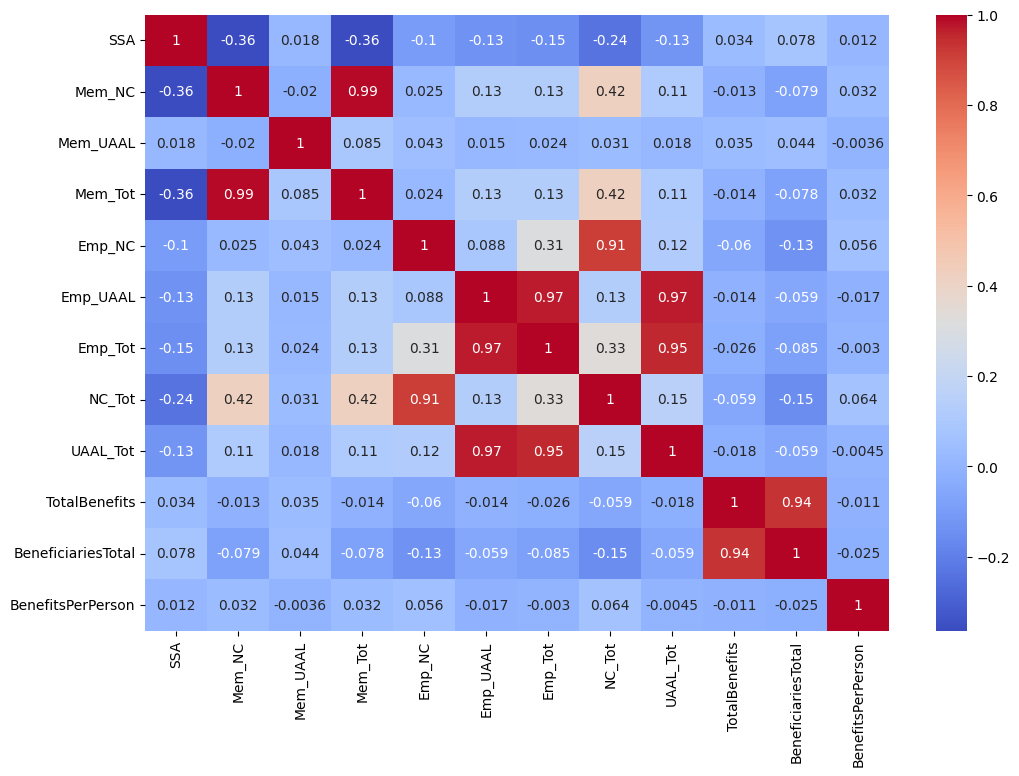

In [499]:
cor=df1.corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor, annot=True, cmap='coolwarm')

In [500]:
df.isnull().sum()

Plan_Shorthand                          0
Investment_Fund                         0
SSA                                     0
Job_Covers                              0
StateName                               0
GovtName                                0
ActRptDate                              0
DateFYE                                 0
Month                                   0
Year                                    0
ValReport                               0
ACFR                                    0
Mem_NC                                  0
Mem_UAAL                                0
Mem_Tot                                 0
Emp_NC                                  0
Emp_UAAL                                0
Emp_Tot                                 0
NC_Tot                                  0
UAAL_Tot                                0
AVA                                   534
AAL                                   536
UAAL                                  534
 FundedRatio_Actuarial            

END OF CLEANING 


In [501]:
# object_features=df1.select_dtypes(include='object').columns.tolist()
# print(object_features,len(object_features))

In [502]:
# df2=pd.get_dummies(df1,columns=object_features, prefix=object_features,drop_first=False, )

In [503]:
# import matplotlib.pyplot as plt

# # Assuming you have a correlation_matrix computed as described earlier
# correlation_matrix = df2.corr()

# plt.figure(figsize=(10, 8), dpi=300)  # Adjust the figure size as needed
# plt.matshow(correlation_matrix, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.colorbar()  # Add a colorbar for reference
# plt.show()

In [504]:
# m=df2.columns

In [505]:
# df2.info()

In [506]:
# x = df2.drop('Mem_NC',axis =1)
# y = df2['Mem_NC']

In [507]:
# from sklearn.model_selection import train_test_split

In [508]:
# train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=56)

In [509]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from sklearn.linear_model import LinearRegression
# linear_reg = LinearRegression()

In [510]:
# linear_reg.fit(train_x, train_y)
# train_predict = linear_reg.predict(train_x)
# test_predict = linear_reg.predict(test_x)
# mse_test = mean_squared_error(test_y, test_predict)
# mae_test = mean_absolute_error(test_y, test_predict)
# r2_test = r2_score(test_y, test_predict)

# print('Mean Squared Error (MSE):', mse_test)
# print('Mean Absolute Error (MAE):', mae_test)
# print('R-squared (R^2) Score:', r2_test)